In [6]:
import subprocess
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.pylab as plt

from datetime import datetime
from bs4 import BeautifulSoup
import json
import seaborn as sns

sns.set(style='whitegrid')
# sns.axes_style("")


pd.set_option('display.max_rows', 500)

My personal github link is below

https://github.com/abdlhersln/Enterprise-Data-Science.git

In [7]:
country_list=['Turkey',
              'US',
              'Germany',
              ] 

In [23]:
pd_raw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
time_idx=pd_raw.columns[4:]

US = pd_raw[pd_raw['Country/Region']=='US'].iloc[:,4:].sum(axis=0)
Turkey = pd_raw[pd_raw['Country/Region']=='Turkey'].iloc[:,4:].sum(axis=0)
Germany = pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4:].sum(axis=0)

population_germany = 83240000
population_turkey = 84340000
population_us = 329500000
         

df_plot = pd.DataFrame({'date':time_idx,'Turkey':Turkey ,'Germany':Germany,'US':US})


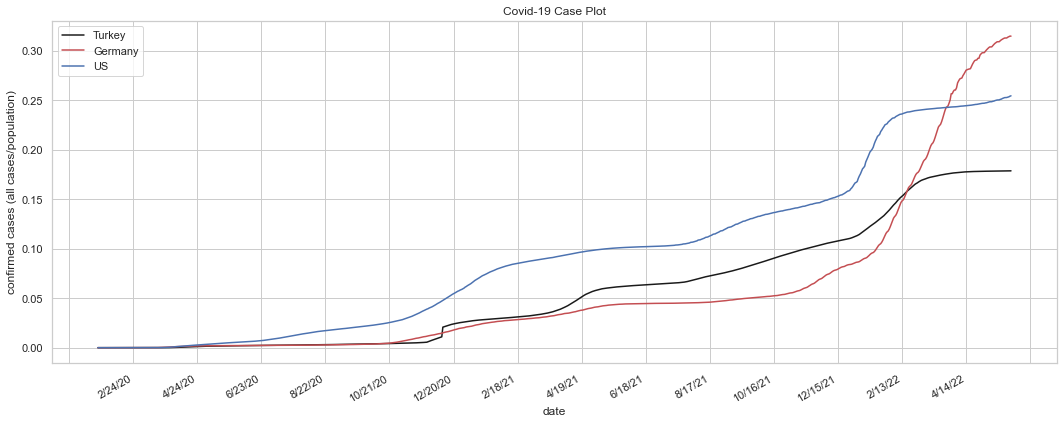

In [24]:
plt.figure(figsize=(18, 7))
plt.plot(df_plot.iloc[:,0],df_plot.iloc[:,1]/population_turkey ,'k')
plt.plot(df_plot.iloc[:,0],df_plot.iloc[:,2]/population_germany ,'r')
plt.plot(df_plot.iloc[:,0],df_plot.iloc[:,3]/population_us ,'b')
plt.xlabel('date')
plt.ylabel('confirmed cases (all cases/population)')
plt.title('Covid-19 Case Plot')
plt.legend(['Turkey' ,'Germany', 'US'])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.savefig('confirmed_cases.png', dpi=300, bbox_inches='tight')
plt.show()


Vaccination Data was obtained from the following web site and github link. 

https://ourworldindata.org/covid-vaccinations

https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations

In [16]:
#vaccination = pd.read_csv(r"C:\Users\Abdullah Eraslan\Desktop\COVID-19-master\owid-covid-data.csv")
vaccination = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
###################### us

us = vaccination[vaccination['location']=='United States']
vaccination_date = us['date']
vaccination_ratio_us = us['people_vaccinated_per_hundred'].fillna(0) #to remove NaN 
vaccination_ratio_us = np.array(vaccination_ratio_us)

for x in range(len(vaccination_ratio_us)-1):                      # some indexs are zero. to remove this error I used for loop
    if vaccination_ratio_us[x]>vaccination_ratio_us[x+1]:
        vaccination_ratio_us[x+1] = vaccination_ratio_us[x]

us_info = pd.DataFrame({'date':vaccination_date,'vaccination ratio':vaccination_ratio_us })

######################## turkey

turkey = vaccination[vaccination['location']=='Turkey']
vaccination_date_turkey = turkey['date']
vaccination_ratio_turkey = turkey['people_vaccinated_per_hundred'].fillna(0)

vaccination_ratio_turkey = np.array(vaccination_ratio_turkey)
vaccination_ratio_turkey = np.insert(vaccination_ratio_turkey,0,np.zeros(len(vaccination_date)-len(vaccination_date_turkey)))

for x in range(len(vaccination_ratio_turkey)-1):
    if vaccination_ratio_turkey[x]>vaccination_ratio_turkey[x+1]:
        vaccination_ratio_turkey[x+1] = vaccination_ratio_turkey[x]

turkey_info = pd.DataFrame({'date':vaccination_date,'vaccination ratio':vaccination_ratio_turkey })

###################### germany
          
germany = vaccination[vaccination['location']=='Germany']
vaccination_date_germany = germany['date']
vaccination_ratio_germany = germany['people_vaccinated_per_hundred'].fillna(0)

vaccination_ratio_germany = np.array(vaccination_ratio_germany)
vaccination_ratio_germany = np.insert(vaccination_ratio_germany,0,np.zeros(len(vaccination_date)-len(vaccination_ratio_germany)))

for x in range(len(vaccination_ratio_germany)-1):
    if vaccination_ratio_germany[x]>vaccination_ratio_germany[x+1]:
        vaccination_ratio_germany[x+1] = vaccination_ratio_germany[x]

germany_info = pd.DataFrame({'date':vaccination_date,'vaccination ratio':vaccination_ratio_germany })

info = pd.DataFrame({'date':vaccination_date,
                     'vaccination ratio of germany':vaccination_ratio_germany,
                     'vaccination ratio of turkey':vaccination_ratio_turkey,
                     'vaccination ratio of us':vaccination_ratio_us,
                    })



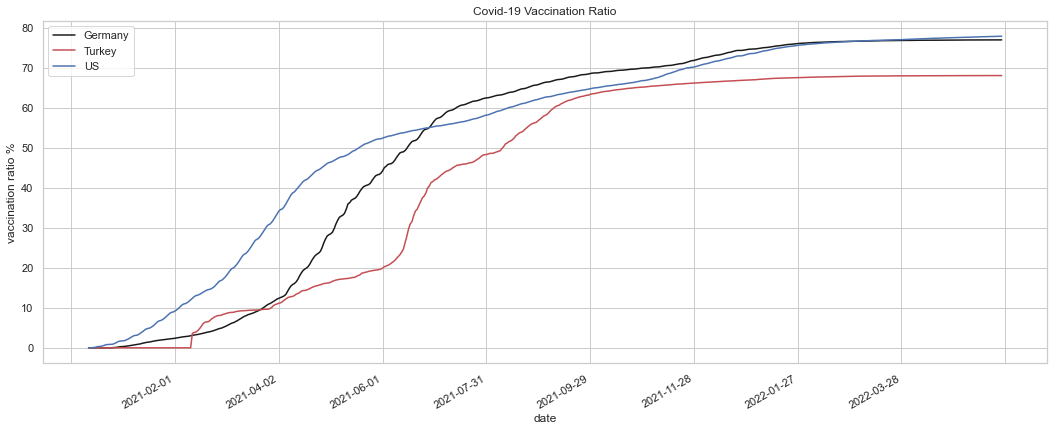

In [17]:
plt.figure(figsize=(18,7))
plt.plot(info.iloc[:,0],info.iloc[:,1] ,'k')
plt.plot(info.iloc[:,0],info.iloc[:,2] ,'r')
plt.plot(info.iloc[:,0],info.iloc[:,3] ,'b')
plt.xlabel('date')
plt.ylabel('vaccination ratio %')
plt.title('Covid-19 Vaccination Ratio')
plt.legend(['Germany','Turkey', 'US'])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.savefig('vaccination_ratio.png', dpi=300, bbox_inches='tight')
plt.show()